In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and wi

In [2]:
df = pd.read_csv("medical_examination.csv", index_col="id")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [3]:
bmi = df["weight"]/(df["height"]/100)**2
df["overweight"] = (bmi > 25).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1


In [4]:
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1


In [5]:
plot_df = pd.melt(df, id_vars=["cardio"], value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
plot_df = pd.DataFrame(plot_df.groupby(["cardio", "variable","value"])["value"].count()).rename(columns={"value": "total"}).reset_index()
plot_df

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


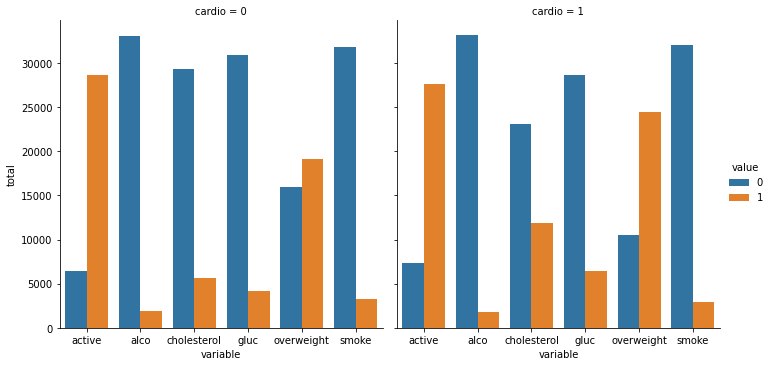

In [6]:
plot = sns.catplot(
    x="variable",
    y="total",
    hue="value",
    col="cardio",
    data=plot_df,
    kind="bar")
plot.fig.savefig("catplot.png")

In [7]:
heat_df = df[(df["ap_lo"] <= df["ap_hi"])
                 & (df["height"] >= df["height"].quantile(0.025))
                 & (df["height"] <= df["height"].quantile(0.975))
                 & (df["weight"] >= df["weight"].quantile(0.025))
                 & (df["weight"] <= df["weight"].quantile(0.975))]
corr = heat_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

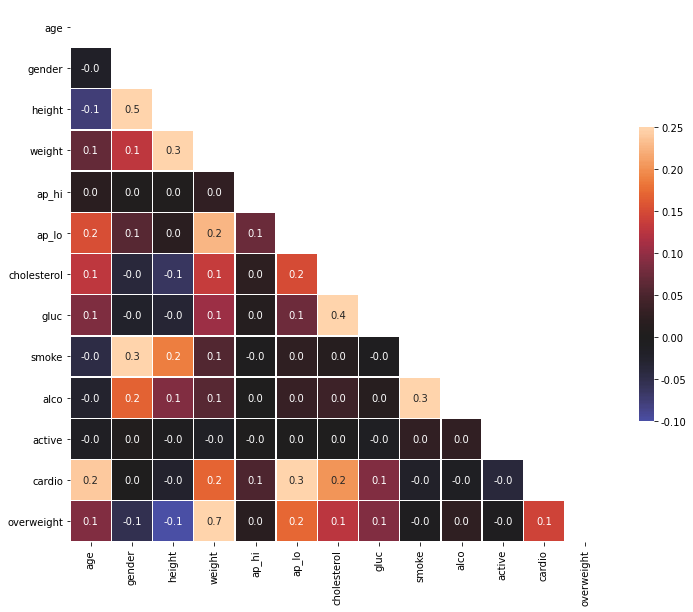

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
corr_matrix = sns.heatmap(
        corr,
        linewidths=.5,
        annot=True,
        fmt=".1f",
        mask=mask,
        square=True,
        center=0,
        vmin=-0.1,
        vmax=0.25,
        cbar_kws={
            "shrink": .45,
            "format": "%.2f"})
fig.savefig("corr_matrix.png")